# Project: Movies Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.

<ul>
<li><h5>Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.</h5></li>

<li><h5>The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time.</h5></li>
</ul>



### Question(s) for Analysis
<ul>
<li><h5>Which genres are most popular from year to year?</h5></li>
<li><h5>What kinds of properties are associated with movies that have high revenues?</h5></li>
<li><h5>What is the avarage runtime?</h5></li>
</ul>

In [90]:
# Import all packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [110]:

# Load your data.
def loadData(path):
    df = pd.read_csv(path)
    return df

df = loadData('Movies_DataSet.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling



In [112]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning


In [117]:
#drop the column thet i dont need in my analysis
df.drop(['original_title','homepage','tagline','overview','keywords'],axis=1,inplace=True)

In [118]:
df.head()

,id,imdb_id,popularity,budget,revenue,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
 14  budget_adj            10866 non-null  float64
 15  revenue_adj        

In [120]:
#show the movies that don't have geners
df[df.genres.isnull()]

,id,imdb_id,popularity,budget,revenue,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100,NaN,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,tt5022680,0.129696,0,0,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,NaN,0.330431,0,0,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,44,NaN,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,tt1073510,0.302095,0,0,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,tt1229827,0.020701,0,0,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,76,NaN,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,tt1525359,0.081892,0,0,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,Michael Scott,0,NaN,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,tt1672218,0.068411,0,0,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,62,NaN,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,tt0270053,0.130018,0,0,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,YÄ±lmaz ErdoÄŸan,110,NaN,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,tt1720044,0.145331,0,0,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,Kim Jin-Yeong,96,NaN,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,tt2305700,0.520520,0,0,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,Danny Boyle,220,NaN,BBC,7/27/12,12,8.3,2012,0.00000,0.0


In [97]:
#drop all rows that have null values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9771 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9771 non-null   int64  
 1   imdb_id               9771 non-null   object 
 2   popularity            9771 non-null   float64
 3   budget                9771 non-null   int64  
 4   revenue               9771 non-null   int64  
 5   cast                  9771 non-null   object 
 6   director              9771 non-null   object 
 7   runtime               9771 non-null   int64  
 8   genres                9771 non-null   object 
 9   production_companies  9771 non-null   object 
 10  release_date          9771 non-null   object 
 11  vote_count            9771 non-null   int64  
 12  vote_average          9771 non-null   float64
 13  release_year          9771 non-null   int64  
 14  budget_adj            9771 non-null   float64
 15  revenue_adj         

In [98]:
newDF = df[['release_year','genres','popularity']]
newDF


,release_year,genres,popularity
0,2015,Action|Adventure|Science Fiction|Thriller,32.985763
1,2015,Action|Adventure|Science Fiction|Thriller,28.419936
2,2015,Adventure|Science Fiction|Thriller,13.112507
3,2015,Action|Adventure|Science Fiction|Fantasy,11.173104
4,2015,Action|Crime|Thriller,9.335014
...,...,...,...
10861,1966,Documentary,0.080598
10862,1966,Action|Adventure|Drama,0.065543
10863,1966,Mystery|Comedy,0.065141
10864,1966,Action|Comedy,0.064317


### First Question --> Which genres are most popular from year to year?

In [121]:
#grouped the data by the realesd year and get the maximum popularity  for each year.
newDF.groupby(['release_year']).max()

,genres,popularity
release_year,,
1960,Thriller|Music|Comedy|Crime,2.610362
1961,Western|Action|Adventure,2.631987
1962,Western|Action|Adventure|Drama,3.170651
1963,Romance|Comedy|Drama,2.508235
1964,Western|Action,3.153791
1965,War|Drama|Romance,1.910465
1966,Western,1.227582
1967,Western,2.550704
1968,Western,3.309196


Text(0, 0.5, 'Movie')

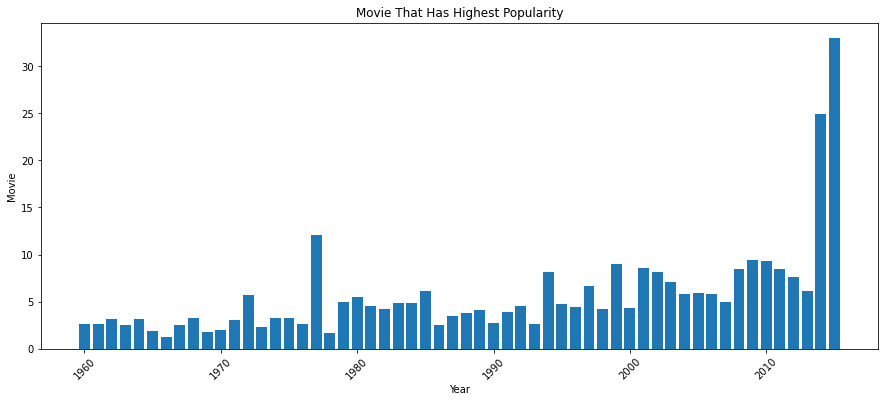

In [122]:
#Visualization.
plt.figure(figsize=(15,6))
plt.bar(x=df["release_year"],height=df["popularity"])
plt.xticks(rotation=45)
plt.title("Movie That Has Highest Popularity")

plt.xlabel('Year')
plt.ylabel('Movie')


### Question 2 --> What kinds of properties are associated with movies that have high revenues?

In [123]:
#make new dataFrame with specific column to use in my analysis
proprties = df[['revenue','director','production_companies','cast']]
proprties.head()

,revenue,director,production_companies,cast
0,1513528810,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1,378436354,George Miller,Village Roadshow Pictures|Kennedy Miller Produ...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
2,295238201,Robert Schwentke,Summit Entertainment|Mandeville Films|Red Wago...,Shailene Woodley|Theo James|Kate Winslet|Ansel...
3,2068178225,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
4,1506249360,James Wan,Universal Pictures|Original Film|Media Rights ...,Vin Diesel|Paul Walker|Jason Statham|Michelle ...


In [124]:
#get the avarage revenue and compare to it then take revenue above the avarage.
avgRevenue = proprties.revenue.mean()
proprties[proprties.revenue > avgRevenue]

,revenue,director,production_companies,cast
0,1513528810,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1,378436354,George Miller,Village Roadshow Pictures|Kennedy Miller Produ...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
2,295238201,Robert Schwentke,Summit Entertainment|Mandeville Films|Red Wago...,Shailene Woodley|Theo James|Kate Winslet|Ansel...
3,2068178225,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
4,1506249360,James Wan,Universal Pictures|Original Film|Media Rights ...,Vin Diesel|Paul Walker|Jason Statham|Michelle ...
...,...,...,...,...
10760,141000000,John Landis,Universal Pictures|Oregon Film Factory|Stage I...,John Belushi|Tim Matheson|John Vernon|Verna Bl...
10761,49579269,Blake Edwards,United Artists|Jewel Productions|Pimlico Films...,Peter Sellers|Andrew Sachs|Herbert Lom|Burt Kw...
10762,50000000,Michael Cimino,Universal Pictures|EMI Films Ltd.,Robert De Niro|John Cazale|John Savage|Christo...
10764,41590893,Lou Adler,Paramount Pictures,Cheech Marin|Tommy Chong|Strother Martin|Edie ...


### Question 3  --> What is the avarage runtime?

In [125]:
df["runtime"].describe()


count    10866.000000
mean       102.070863
std         31.381405
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

Text(0.5, 1.0, 'Tima For all the movies')

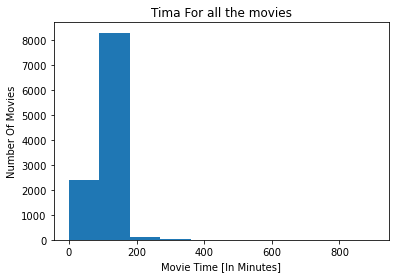

In [126]:
plt.hist(df['runtime'])
plt.xlabel('Movie Time [In Minutes]')
plt.ylabel('Number Of Movies')
plt.title('Tima For all the movies')

<a id='conclusions'></a>
## Conclusions

<ul>
<li><h5>(Director - production companies - cast) are very important properties to get hight revenue.</h5></li>
<li><h5>The average runtime is 100 min.</h5></li>
</ul>

### Limitations
> Missing value affect the result

In [103]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295